#**Reconhecimento de Padrões**

*- Trabalho 5: Regressão e Clustering*

*- Renoir Sampaio (389113)*

##**Preparação dos dados e informações**


In [1]:
# Importando bibliotecas
import numpy as np # Algebra Linear
from numpy.linalg import inv, det, norm # Inversa e determinante
import pandas as pd # Processamento de dados
import seaborn as sns # Plotagem
import matplotlib.pyplot as plt # Plotagem
import math # Matemática
from random import randint, uniform # Aleatoriedade
from sklearn.metrics import accuracy_score, recall_score, precision_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

In [2]:
# Realiza a leitura do dataset
df = pd.read_csv('/content/kc_house_data.csv', sep=',')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [3]:
# Variáveis preditivas e variável desfecho
X = df[['bedrooms',	'bathrooms',	'sqft_living',	'sqft_lot',	'floors',	'waterfront',	'view',	'condition',	'grade',	'sqft_above',	'sqft_basement',	'yr_built',	'yr_renovated',	'zipcode', 'lat',	'long',	'sqft_living15',	'sqft_lot15']].values
y = df['price'].values

##**Regressão Linear Múltipla**


In [4]:
for p in range(5):
  rand = randint(1, 10000)
  # Divisão dos dados de treino e teste, treinamento (70%) e teste (30%)
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, train_size=0.70, random_state=rand)
  # Inserindo valores 1 na coluna zero do dataset de treino
  X_train_ones = X_train.copy()
  X_train_ones = pd.DataFrame(X_train_ones)
  ones = np.ones(X_train.shape[0])
  X_train_ones.insert(0, "ones", ones, True)
  X_train_ones = np.array(X_train_ones)
  # Cálculo do beta B = (X.T * X + gama)^-1 * X.T * y
  B = (inv(X_train_ones.T @ X_train_ones + 0.01)) @ X_train_ones.T @ y_train
  # Inserindo valores 1 na coluna zero do dataset de teste
  X_test_ones = X_test.copy()
  X_test_ones = pd.DataFrame(X_test_ones)
  ones = np.ones(X_test.shape[0])
  X_test_ones.insert(0, "ones", ones, True) 
  X_test_ones = np.array(X_test_ones)
  # Cálculo do y estimado
  y_estimado = X_test_ones @ B
  # Cálculo da soma dos quadrados do resíduo
  RSS = ((y_test - y_estimado)**2).sum()
  # Cálculo da soma dos quadrados menos a média
  TSS = ((y_test - y_test.mean())**2).sum()
  # Coeficiente de determinação ajustado
  n = X_test_ones.shape[0]
  k = X_test_ones.shape[1]
  R2 = 1 - (RSS/(n-k))/(TSS/(n-1))
  print(f'Interação {p+1}, valor do coeficiente de determinação ajustado: R2 = {R2}')

Interação 1, valor do coeficiente de determinação ajustado: R2 = 0.6987126353019733
Interação 2, valor do coeficiente de determinação ajustado: R2 = 0.702680885283661
Interação 3, valor do coeficiente de determinação ajustado: R2 = 0.6879107363854979
Interação 4, valor do coeficiente de determinação ajustado: R2 = 0.6915090992551233
Interação 5, valor do coeficiente de determinação ajustado: R2 = 0.6949641433167411


Text(0, 0.5, 'Predict prices')

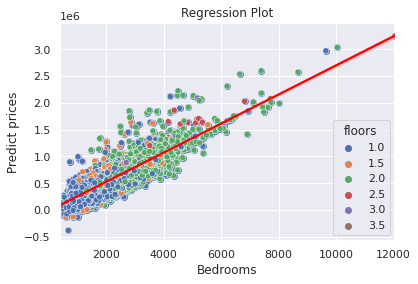

In [5]:
# Plotagem de exemplo da regressão linear
sns.set_theme(color_codes = True)
X_test = pd.DataFrame(X_test)
X_test = X_test.rename(columns = {4: 'floors'})
sns.regplot(data = X_test, x = X_test[2],  y = y_estimado, line_kws = {"color": "red"})
sns.scatterplot(x = X_test[2], y = y_estimado, data = X_test, hue = 'floors', palette = "deep")
plt.title('Regression Plot')
plt.xlabel('Bedrooms')
plt.ylabel('Predict prices')

**O modelo estimado de regressão (linear) “se ajustou” bem aos dados? Justifique.**

**Resposta:** *Tal modelo não se mostrou tão bem ajustado já que o coeficiente de determinação ajustado teve uma média próxima a 0.69, o que podemos considerar como um valor não tão bom para o 'R2'. Sendo assim, podemos dizer que o modelo não é o ideal e que talvez um modelo que não seja linear consiga abranger melhor os dados.*

##**Regressão Polinomial**


In [6]:
def load_dataset():
    # Carregando dataset
    ds = pd.read_csv("/content/aerogerador.dat", sep = '\t', header = None)
    # Removendo colunas com valores NaN
    ds = ds.drop(columns = [2])
    # Nomeando as colunas
    ds.columns = ["vel", "pot"]
    # Retornando o dataset em forma de array numpy e o dataset original
    return np.array(ds["vel"]), np.array(ds["pot"]), ds

In [7]:
# Cálculo do coeficiente de determinação R2 ajustado
def R2_ajst(y, y_prev, n, p):
    RSS = np.sum((y - y_prev) ** 2) / (n - p)
    TSS = np.sum((y - np.mean(y)) ** 2) / (n - 1)
    return 1 - (RSS / TSS)

#####################################################################
|/__\||/__\||/__\||/__\||/__\||/__\||/__\||/__\||/__\||/__\||/__\||/_
#####################################################################
Resultados:
R2 ajustado: 0.92913
B: [-217.66367019   56.44105103]


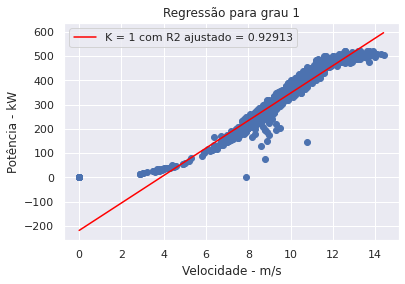

#####################################################################
|/__\||/__\||/__\||/__\||/__\||/__\||/__\||/__\||/__\||/__\||/__\||/_
#####################################################################
Resultados:
R2 ajustado: 0.94337
B: [-92.92537615  26.7116311    1.69370754]


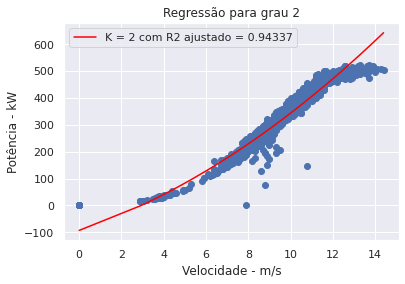

#####################################################################
|/__\||/__\||/__\||/__\||/__\||/__\||/__\||/__\||/__\||/__\||/__\||/_
#####################################################################
Resultados:
R2 ajustado: 0.96898
B: [ 32.58024406 -58.74266951  15.04969131  -0.59235587]


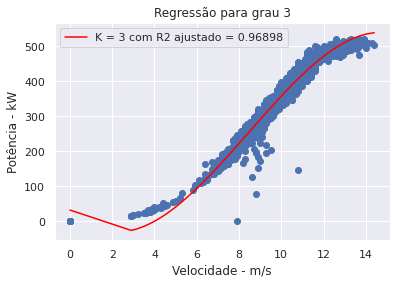

#####################################################################
|/__\||/__\||/__\||/__\||/__\||/__\||/__\||/__\||/__\||/__\||/__\||/_
#####################################################################
Resultados:
R2 ajustado: 0.97363
B: [-0.38484092 10.36345668 -5.00106915  1.43359616 -0.06759215]


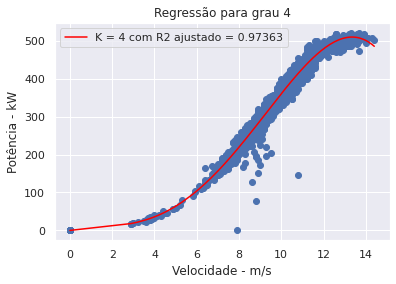

#####################################################################
|/__\||/__\||/__\||/__\||/__\||/__\||/__\||/__\||/__\||/__\||/__\||/_
#####################################################################
Resultados:
R2 ajustado: -0.41803
B: [-1.33475258e-01  7.24096790e+00 -3.46972575e+00  1.16710057e+00
 -4.77849382e-02  4.35405178e-04]


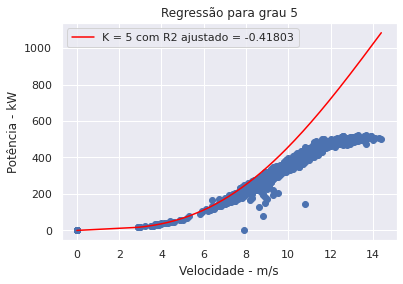

In [8]:
for cont in range(5):
  # Variável do problema
  x, y, ds = load_dataset()
  k = cont + 1
  p = k + 1
  n = len(x)
  gama = 0.01
  features = []

  # Matriz X. Codição para retorno para a matriz de graus diferentes
  if k == 1:  # grau 1
      one = np.ones(len(x))
      x1 = x
      features = [one, x1]

  if k == 2:  # grau 2
      one = np.ones(len(x))
      x1 = x
      x2 = x ** 2
      features = [one, x1, x2]

  elif k == 3:  # grau 3
      one = np.ones(len(x))
      x1 = x
      x2 = x ** 2
      x3 = x ** 3
      features = [one, x1, x2, x3]

  elif k == 4:  # grau 4
      one = np.ones(len(x))
      x1 = x
      x2 = x ** 2
      x3 = x ** 3
      x4 = x ** 4
      features = [one, x1, x2, x3, x4]

  elif k == 5:  # grau 5
      one = np.ones(len(x))
      x1 = x
      x2 = x ** 2
      x3 = x ** 3
      x4 = x ** 4
      x5 = x ** 5
      features = [one, x1, x2, x3, x4, x5]

  # Array de compreenção de listas para construção da matriz X resultante
  X = np.array([list(x) for x in features]).T
  # Matriz X transposta
  X_transp = X.T
  # Matriz X multiplicada vetorialmente com sua transposta
  X_transp_X = X @ X_transp
  # Cálculo da matriz inversa da operação X_transp_X + gama * matriz identidade
  X_inv = np.linalg.inv(X_transp_X + gama * np.identity(len(x)))
  # Termo onde a matriz inversa é multiplicada pela matriz transposta de X
  A = X_transp @ X_inv
  # Valor do coeficiente B
  B = A @ y
  # Cálculo do y previsto
  y_previsto = X @ B
  # R2 ajustado
  R2_ajustado = R2_ajst(y, y_previsto, n, p)

  # Representação dos resultados
  print('#####################################################################')
  print('|/__\||/__\||/__\||/__\||/__\||/__\||/__\||/__\||/__\||/__\||/__\||/_')
  print('#####################################################################')
  print("Resultados:")
  print("R2 ajustado: {}".format(round(R2_ajustado, 5)))
  print("B: {}".format(B))

  # Plotagem do gráfico
  plt.scatter(x, y)
  plt.plot(x, y_previsto, c = "red", label = "K = {} com R2 ajustado = {}".format(k, round(R2_ajustado, 5)),)
  plt.title("Regressão para grau {}".format(k))
  plt.xlabel("Velocidade - m/s")
  plt.ylabel("Potência - kW")
  plt.legend()
  plt.show()

**Qual seria o melhor valor de k para a aproximação desta curva de geração de potência? Justifique.**

**Resposta:** *Podemos ver claramente com os gráficos e valores finais que o melhor 'k' foi igual a 4 (grau de polinômio igual a 4) onde o R2 foi de 0.97363, máximo valor obtido. Vemos também que a regressão traçada no gráfico indica essa resposta de forma visual, se adequando melhor aos pontos.*